# getting data from the one minute dataset

# rollong mean of the volume

# select which stock to be used in the analysis

Top Trading Volume Stocks & AAPL & MGM & FITB & MPC & GS \\
Bottom Trading Volume Stocks & AEP & HP & KLAC & GPN & ROK \\

In [ ]:
lst = ['AAPL', 'MGM','FITB','MPC','GS','AEP','HP','KLAC','GPN','ROK']
for symbol in lst:

In [9]:
%%bash
cd /scratch/local/kang/
ls -lh

total 80G
drwxr-sr-x  4 kang flair-users   48 Nov 26 14:36 AMZN_data
drwxr-sr-x  2 kang flair-users 4.0K Aug 16  2023 cmem
drwxr-sr-x  4 kang flair-users   48 Nov 26 14:36 _data
-r-x------  1 kang flair-users 220M Nov 26 14:24 _data_dwn_32_302__A_2017-01-01_2017-12-31_10.7z
-r-x------  1 kang flair-users 684M Nov 26 14:24 _data_dwn_32_302__AAL_2017-01-01_2017-12-31_10.7z
-r-x------  1 kang flair-users 175M Nov 26 14:24 _data_dwn_32_302__AAP_2017-01-01_2017-12-31_10.7z
-r-x------  1 kang flair-users 2.3G Nov 26 14:24 _data_dwn_32_302__AAPL_2017-01-01_2017-12-31_10.7z
-r-x------  1 kang flair-users 457M Nov 26 14:25 _data_dwn_32_302__ABBV_2017-01-01_2017-12-31_10.7z
-r-x------  1 kang flair-users 194M Nov 26 14:25 _data_dwn_32_302__ABC_2017-01-01_2017-12-31_10.7z
-r-x------  1 kang flair-users  92M Nov 26 14:25 _data_dwn_32_302__ABMD_2017-01-01_2017-12-31_10.7z
-r-x------  1 kang flair-users 411M Nov 26 14:25 _data_dwn_32_302__ABT_2017-01-01_2017-12-31_10.7z
-r-x------  1 kang flair-user

In [ ]:
%%bash
docker build --build-arg UID=$UID --build-arg GIT_TOKEN=$GIT_TOKEN -t d345fn01 .
docker run --name d345fn01 --user $(id -u) -v $(pwd):/homes/80/kang -it --gpus '"device=3,4,5"' d345fn01
docker run -it -v /scratch/local/kang:/data d345fn01

In [ ]:
%%bash
cd /data
touch run12feb.sh
cat > run12feb.sh << 'EOF'
input_dir="/data/" # Directory containing .7z files
sp500_dir="/homes/80/kang/SP500/" # Directory to store all stock data directories 

# Define a list of stock names
declare -a stock_list=('AAPL' 'MGM' 'FITB' 'MPC' 'GS' 'AEP' 'HP' 'KLAC' 'GPN' 'ROK')

# Iterate over each .7z file in the input directory
for file in "$input_dir"/*.7z; do
    # Extract the stock name from the file name
    stock_name=$(echo "$file" | grep -oP '(?<=__)\w+(?=_)')

    # Check if the extracted stock name is in the list
    if [[ " ${stock_list[@]} " =~ " ${stock_name} " ]]; then
        # Create directories for the stock data and its subdirectories
        stock_dir="${sp500_dir}${stock_name}_data"
        mkdir -p "$stock_dir/Book_10" "$stock_dir/Flow_10"

        # Unzip the file into a temporary directory
        temp_dir=$(mktemp -d)
        7z x "$file" -o"$temp_dir"

        # Move files to appropriate subdirectories
        for csv_file in "$temp_dir"/*.csv; do
            if [[ $csv_file == *"orderbook"* ]]; then
                mv "$csv_file" "$stock_dir/Book_10/"
            elif [[ $csv_file == *"message"* ]]; then
                mv "$csv_file" "$stock_dir/Flow_10/"
            fi
        done

        # Remove the temporary directory
        rm -r "$temp_dir"

        # Move the stock directory into the SP500 directory
        # mv "$stock_dir" "$sp500_dir/" # This line is not needed since "$stock_dir" already includes "$sp500_dir"
    fi
done
EOF



In [ ]:

%%bash
# cd /data
touch run12feb.sh
cat > run12feb.sh << 'EOF'
input_dir="/homes/80/kang/scratch_local/" # Directory containing .7z files
# input_dir="/data/" # Directory containing .7z files
sp500_dir="/homes/80/kang/SP500/" # Directory to store all stock data directories 

# Define a list of stock names
declare -a stock_list=('GPC')

# Iterate over each .7z file in the input directory
for file in "$input_dir"/*.7z; do
    # Extract the stock name from the file name
    stock_name=$(echo "$file" | grep -oP '(?<=__)\w+(?=_)')

    # Check if the extracted stock name is in the list
    if [[ " ${stock_list[@]} " =~ " ${stock_name} " ]]; then
        # Create directories for the stock data and its subdirectories
        stock_dir="${sp500_dir}${stock_name}_data"
        mkdir -p "$stock_dir/Book_10" "$stock_dir/Flow_10"

        # Unzip the file into a temporary directory
        temp_dir=$(mktemp -d)
        7z x "$file" -o"$temp_dir"

        # Move files to appropriate subdirectories
        for csv_file in "$temp_dir"/*.csv; do
            if [[ $csv_file == *"orderbook"* ]]; then
                mv "$csv_file" "$stock_dir/Book_10/"
            elif [[ $csv_file == *"message"* ]]; then
                mv "$csv_file" "$stock_dir/Flow_10/"
            fi
        done

        # Remove the temporary directory
        rm -r "$temp_dir"

        # Move the stock directory into the SP500 directory
        # mv "$stock_dir" "$sp500_dir/" # This line is not needed since "$stock_dir" already includes "$sp500_dir"
    fi
done
EOF



In [ ]:
bash ./run12feb.sh

In [5]:
%%bash
# cd /homes/80/kang/SP500/
cd /scratch/local/kang/SP500
ls -lh

total 0
drwxr-sr-x 4 kang 3509 48 Feb 12 12:43 AAPL_data
drwxr-sr-x 4 kang 3509 36 Feb 12 12:46 AEP_data
drwxr-sr-x 4 kang 3509 48 Feb 12 12:47 FITB_data
drwxr-sr-x 4 kang 3509 48 Feb 12 12:48 GPN_data
drwxr-sr-x 4 kang 3509 36 Feb 12 12:48 GS_data
drwxr-sr-x 4 kang 3509 48 Feb 12 12:49 HP_data
drwxr-sr-x 4 kang 3509 48 Feb 12 12:49 KLAC_data
drwxr-sr-x 4 kang 3509 48 Feb 12 12:49 MGM_data
drwxr-sr-x 4 kang 3509 48 Feb 12 12:49 MPC_data
drwxr-sr-x 4 kang 3509 48 Feb 12 12:49 ROK_data


In [ ]:
(base) kang@flair-node-01:/scratch/local/kang/SP500$ du -lh
7.6G    ./AEP_data/Book_10
1.6G    ./AEP_data/Flow_10
9.2G    ./AEP_data
7.0G    ./GS_data/Book_10
1.4G    ./GS_data/Flow_10
8.4G    ./GS_data
16G     ./FITB_data/Book_10
3.0G    ./FITB_data/Flow_10
19G     ./FITB_data
0       ./HP_data/Book_10
0       ./HP_data/Flow_10
0       ./HP_data
2.7G    ./GPN_data/Book_10
579M    ./GPN_data/Flow_10
3.3G    ./GPN_data
0       ./KLAC_data/Book_10
0       ./KLAC_data/Flow_10
0       ./KLAC_data
54G     ./AAPL_data/Book_10
11G     ./AAPL_data/Flow_10
64G     ./AAPL_data
0       ./MGM_data/Book_10
0       ./MGM_data/Flow_10
0       ./MGM_data
0       ./MPC_data/Book_10
0       ./MPC_data/Flow_10
0       ./MPC_data
0       ./ROK_data/Book_10
0       ./ROK_data/Flow_10
0       ./ROK_data
103G    .

In [1]:
lst = ['AEP','GS','FITB','GPN','AAPL']

In [2]:
path = '/scratch/local/kang/SP500'

## new code

In [6]:
import ray
ray.shutdown()
ray.init(num_cpus = 40, object_store_memory = 60 * 10**9)
# ray.init(num_cpus = 40, object_store_memory = 100 * 10**9)

2024-02-25 07:01:18,122	INFO worker.py:1724 -- Started a local Ray instance.


Python version:,3.9.12
Ray version:,2.9.2


In [4]:
from os import listdir  
from tqdm import tqdm  
import pandas as pd  
import numpy as np
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)

def data_alignment(ATFolder):
    '''
    The logic here is to load the three dir: messages data, rolling mean and vwap
    Then find the common_dates of all these three,
    Then pass into the init of the base env, 
    To only load the data window in the common dates.
    But we should also align the symbols, it has been done, as we will pass symbols 
    into the load_forecasted_and_original_volume_VWAP and load_forecasted_volume_RM
    '''
    def load_forecasted_and_original_volume_VWAP(symbol):
        import pandas as pd
        import numpy as np
        dir = '/homes/80/kang/cmem/output/0900_r_output_with_features_csv_fractional_shares_clipped_vwap/'
        df = pd.read_csv(dir+f'{symbol}.csv',index_col=0)
        df['symbol'] = symbol
        from datetime import datetime, timedelta
        timeHMs = np.array([int((datetime(2023, 1, 1, 9, 30) + i * timedelta(minutes=15)).strftime('%H%M')) for i in range(26)])
        timeHMs = np.tile(timeHMs, (1, int(df.shape[0]/timeHMs.shape[0]))).squeeze()
        df['timeHMs'] = timeHMs
        df = df[['date', 'timeHMs', 'x', 'qty', 'symbol']]
        d = df[['date', 'timeHMs', 'x']].pivot(index = 'date', columns = 'timeHMs')
        f = df[['date', 'timeHMs', 'qty']].pivot(index = 'date', columns = 'timeHMs')
        return d, f # x, qty

    def load_forecasted_volume_RM(symbol):
        import pandas as pd
        import numpy as np
        dir = '/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/'
        df = pd.read_csv(dir+f'{symbol}.csv',index_col=0)
        df.columns = ['date', 'timeHMs', 'timeHMe', 'x_rm', 'symbol']
        df.date = df.date.apply(lambda d: str(d)[:4]+'-'+str(d)[4:6]+'-'+str(d)[6:8]) if len(str(df.date[0])) == 8 else df.date
        d = df[['date', 'timeHMs', 'x_rm']].pivot(index = 'date', columns = 'timeHMs')
        d = d.fillna(method = "ffill")
        return d # x

    def load_files(symbol):
        alphatradePath = ATFolder
        # alphatradePath = f"{ATFolder}/{symbol}_data"
        messagePath = alphatradePath+"/Flow_10/"
        orderbookPath = alphatradePath+"/Book_10/"
        from os import listdir; from os.path import isfile, join; import pandas as pd
        readFromPath = lambda data_path: sorted([f for f in listdir(data_path) if isfile(join(data_path, f))])
        messageFiles, orderbookFiles = readFromPath(messagePath), readFromPath(orderbookPath)
        message_dates = np.array([m[4:14] for m in messageFiles])
        message_dates = np.array([m.split("_")[1] for m in messageFiles])
        return message_dates
    
    def get_symbols():
        from os.path import isdir
        from os import listdir
        path_dir1 = '/homes/80/kang/cmem/output/0900_r_output_with_features_csv_fractional_shares_clipped_vwap/'
        path_dir2 = ATFolder
        symbols1 = np.array([dirname.split(".")[0] for dirname in listdir(path_dir1)])
        symbols2 = np.array([path_dir2.split("_")[0].split("/")[-1]])
        # symbols2 = np.array([dirname.split("_")[0] for dirname in listdir(path_dir2) 
        #             if isdir(os.path.join(path_dir2, dirname))])
        intersection = np.intersect1d(symbols1, symbols2)
        return intersection
    common_stocks = get_symbols()
    assert len(common_stocks) >= 1
    
    def get_raw_VWAPs_ORACLEs_RMs():
        ds = [(symbol, *load_forecasted_and_original_volume_VWAP(symbol)) for symbol in common_stocks]
        VWAPs = [(d[0], d[1]) for d in ds]
        ORACLEs = [(d[0], d[2]) for d in ds]
        RMs = [(symbol, load_forecasted_volume_RM(symbol)) for symbol in common_stocks]
        return VWAPs, ORACLEs, RMs
    VWAPs, ORACLEs, RMs = get_raw_VWAPs_ORACLEs_RMs()
    
    def get_common_dates():
        dates_vwap =  VWAPs[-1][-1].index.to_numpy()
        dates_rm =  RMs[-1][-1].index.to_numpy()
        message_dates = load_files(common_stocks[-1]) 
        common_dates = np.intersect1d(np.intersect1d(dates_vwap, message_dates),dates_rm)
        return common_dates
    common_dates = get_common_dates()
    
    def align_dates(Xs):
        Xs = {d[0]: d[1].loc[common_dates] for d in Xs}
        return Xs
    VWAPs, ORACLEs, RMs = list(map(align_dates, [VWAPs, ORACLEs, RMs]))

    def generate_TWAPs(RMs):
        def f(df):
            dff = df.copy()
            dff.loc[:, :] = 1
            return dff
        return {symbol: f(df) for symbol, df in RMs.items()}
    TWAPs = generate_TWAPs(RMs)
            
    return common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs


  
lst = ['AEP','GS','FITB','GPN','AAPL']
# symbol = 'AAPL' 
symbol = 'GPN'
  
ATFolder = f"/scratch/local/kang/SP500/{symbol}_data"  
common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs = data_alignment(ATFolder)  
ob_columns = sum([[f'ask_price_{i}',f'ask_qty_{i}',f'bid_price_{i}',f'bid_qty_{i}'] for i in range(10)] , [])
msg_columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark'] 

In [7]:
# @ray.remote(num_cpus=20)
# @ray.remote(num_cpus=40, memory=80*10**9)
@ray.remote(num_cpus=20, memory=40*10**9)
def read_csv_obs(file): return {file.split('_')[1]: pd.read_csv(ATFolder + "/Book_10/" + file, header=None, names=ob_columns)}
obs = [ray.get(f) for f in tqdm([read_csv_obs.remote(file) for file in listdir(ATFolder + "/Book_10/")])]

100%|██████████| 251/251 [00:10<00:00, 23.95it/s]


In [8]:
# @ray.remote(num_cpus=40, memory=80*10**9)
@ray.remote(num_cpus=20, memory=40*10**9)
def read_csv_msgs(file): return {file.split('_')[1]: pd.read_csv(ATFolder + "/Flow_10/" + file, header=None, names=msg_columns)}
msgs = [ray.get(f) for f in tqdm([read_csv_msgs.remote(file) for file in listdir(ATFolder + "/Flow_10/")])]


100%|██████████| 251/251 [00:02<00:00, 86.64it/s] 


In [9]:

from collections import ChainMap
msgs = dict(ChainMap(*msgs))
obs = dict(ChainMap(*obs))
assert len(obs) == len(msgs)  

In [10]:
# obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None, names = ob_columns) for file in tqdm(listdir(ATFolder + "/Book_10/"))]  
# msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/"))]  
# obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Book_10/")[:2])]  
# msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/")[:2])]  
lobster_dates = [file.split("_")[1] for file in listdir(ATFolder + "/Book_10/")]
dates = np.intersect1d(common_dates, lobster_dates)
len(dates)

109

In [26]:
@ray.remote
def get_result(ob, msg, date):
    try:
        # prepare ob msg  
        msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  
        # df  
        df = pd.concat([msg, ob], axis=1)  
        df.time *= 1e9  
        df.time = df.time.apply(pd.to_datetime)  
        df.time = df.time.dt.time  
        df['shorten_time'] = pd.to_datetime(df['time'].apply(lambda x:str(x).split('.')[0]), format='%H:%M:%S').dt.strftime('%H%M').astype(str)  
        # df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)  
        df = df[(df['shorten_time'] >= '0930') & (df['shorten_time'] < '1600')]  
        # truncate
        mean = df[[f'bid_price_{i}' for i in range(10)]].mean().mean() 
        # mean = df[[f'bid_price_{i}' for i in range(5)]].mean().mean() 
        mean_ceilling = mean * 10
        mean_bottom = mean * 0.1
        for i in range(10):
            df=df[(mean_bottom<=df[f'bid_price_{i}']) & (df[f'bid_price_{i}']<=mean_ceilling)]

        g=df.groupby('shorten_time')
        lst = []
        for idx, itm in g: 
            itm['order_flow_volume'] = itm[itm['type']==4]['qty'].sum()
            lst.append(itm)
        df=pd.concat(lst)

            
        # task  
        df['trading_volume'] = df[df.type == 4].qty.sum()  
        task_ratio = 0.05  
        df['task_volume'] = (df.trading_volume * task_ratio).apply(int)  
        # dfa  
        dfa = df.drop_duplicates('shorten_time', keep='last')  
            
        # date  
        # date = dates[i]  
        # date = '2017-07-20'  # {from file can get this} - This comment suggests you might want to extract the date from a file.  

        # rm  
        def get_aligned_values(VWAPs):  
            vwap = VWAPs[symbol].loc[date, :]  
            vwap = vwap.reset_index()  
            vwap.timeHMs = vwap.timeHMs.astype(int).astype(str).apply(lambda x: x.zfill(4))  
            vwap.drop('level_0', axis=1, inplace=True)  
            time_df = pd.DataFrame(df.shorten_time.unique(), columns=['timeHMs'])  
            dfb = pd.merge(vwap, time_df, how='right', on='timeHMs')  
            dfb.fillna(method='ffill', inplace=True)  
            return dfb.iloc[:, -1].to_numpy()  

        # jax  
        import jax  
        import jax.numpy as jnp  

        @jax.jit  
        def hamilton_apportionment_permuted_jax(votes, seats, key):  
            init_seats, remainders = jnp.divmod(votes, jnp.sum(votes) / seats)  # std_divisor = jnp.sum(votes) / seats  
            remaining_seats = jnp.array(seats - init_seats.sum(), dtype=jnp.int32)  # in {0,1,2,3}  

            def f(carry, x):  
                key, init_seats, remainders = carry  
                key, subkey = jax.random.split(key)  
                chosen_index = jax.random.choice(subkey, remainders.size, p=(remainders == remainders.max()) / (remainders == remainders.max()).sum())  
                return (key, init_seats.at[chosen_index].add(jnp.where(x < remaining_seats, 1, 0)), remainders.at[chosen_index].set(0)), x  

            (key, init_seats, remainders), x = jax.lax.scan(f, (key, init_seats, remainders), xs=jnp.arange(votes.shape[0]))  
            return init_seats.astype(jnp.int32)  

        rng = jax.random.PRNGKey(0)  
        rng, key = jax.random.split(rng, 2)  

        # dfa with task info  
        dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)  
        dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)  
        dfa['order_flow'] = hamilton_apportionment_permuted_jax(dfa.order_flow_volume.to_numpy(), dfa.task_volume.iloc[0], key)  
        dfa['rm'] = hamilton_apportionment_permuted_jax(get_aligned_values(RMs), dfa.task_volume.iloc[0], key)  
        dfa['twap'] = hamilton_apportionment_permuted_jax(get_aligned_values(TWAPs), dfa.task_volume.iloc[0], key)  

        # revenue
        def f(x, string):
            qty = x[string]
            levels = [(f'bid_price_{i}', f'bid_qty_{i}') for i in range(10)]
            revenue, accumulated_qty = 0, 0
            
            for level_price, level_qty in levels:
                if qty <= accumulated_qty + x[level_qty]:
                    revenue = revenue + (qty - accumulated_qty) * x[level_price]
                    break
                revenue += x[level_qty] * x[level_price]
                accumulated_qty += x[level_qty]
            return revenue



        for s in ['vwap','oracle','order_flow','rm','twap']:
        # for s in ['vwap','oracle','rm','twap']:
            dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)

        # results  
        dfs = dfa.sum()  
        vwap_advantage = (dfs.vwap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        oracle_advantage = (dfs.oracle_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        order_flow_advantage = (dfs.order_flow_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        twap_advantage = (dfs.twap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        # result = [date, vwap_advantage, oracle_advantage, twap_advantage]   
        result = [date, vwap_advantage, oracle_advantage, order_flow_advantage, twap_advantage]   
        return result
    except Exception as e:
        print(f"Error reading {symbol} on {date}: {e}")

In [27]:
ids = [get_result.remote(obs[date], msgs[date], date) for date in tqdm(dates)]
len(ids)

100%|██████████| 109/109 [00:00<00:00, 259.44it/s]


109

In [28]:
results = [ray.get(idx) for idx in tqdm(ids)]    

  0%|          | 0/109 [00:00<?, ?it/s](get_result pid=1532178) /tmp/ipykernel_1513191/3881433492.py:74: SettingWithCopyWarning: 
(get_result pid=1532178) A value is trying to be set on a copy of a slice from a DataFrame.
(get_result pid=1532178) Try using .loc[row_indexer,col_indexer] = value instead
(get_result pid=1532178) 
(get_result pid=1532178) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(get_result pid=1532178) /tmp/ipykernel_1513191/3881433492.py:75: SettingWithCopyWarning: 
(get_result pid=1532178) A value is trying to be set on a copy of a slice from a DataFrame.
(get_result pid=1532178) Try using .loc[row_indexer,col_indexer] = value instead
(get_result pid=1532178) 
(get_result pid=1532178) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(get_result pid=1532178) /tmp/ipykernel_1513191/38814

In [29]:
len(results)
results_ = [result for result in results if result != None]
len(results_)

109

In [30]:
    
dff = pd.DataFrame(results_, columns=['date', 'vwap_advantage', 'oracle_advantage', 'order_flow_advantage', 'twap_advantage'])
dff.mean()

(get_result pid=1531899) /tmp/ipykernel_1513191/3881433492.py:76: SettingWithCopyWarning: 
(get_result pid=1531899) A value is trying to be set on a copy of a slice from a DataFrame.
(get_result pid=1531899) Try using .loc[row_indexer,col_indexer] = value instead
(get_result pid=1531899) 
(get_result pid=1531899) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(get_result pid=1531899) /tmp/ipykernel_1513191/3881433492.py:77: SettingWithCopyWarning: 
(get_result pid=1531899) A value is trying to be set on a copy of a slice from a DataFrame.
(get_result pid=1531899) Try using .loc[row_indexer,col_indexer] = value instead
(get_result pid=1531899) 
(get_result pid=1531899) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(get_result pid=1531899) /tmp/ipykernel_1513191/3881433492.py:78: SettingWithCopyWarning: 
(

vwap_advantage         -0.729623
oracle_advantage       -1.740881
order_flow_advantage   -0.538163
twap_advantage         -0.343842
dtype: float64

<AxesSubplot:>

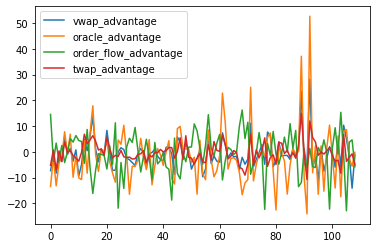

In [31]:
dff.plot()

### debug cell

In [11]:
date = dates[0]
ob, msg, date = obs[date],msgs[date],date

In [73]:
# prepare ob msg  
msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  
# df  
df = pd.concat([msg, ob], axis=1)  
df.time *= 1e9  
df.time = df.time.apply(pd.to_datetime)  
df.time = df.time.dt.time  
df['shorten_time'] = pd.to_datetime(df['time'].apply(lambda x:str(x).split('.')[0]), format='%H:%M:%S').dt.strftime('%H%M').astype(str)  
# df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)  
df = df[(df['shorten_time'] >= '0930') & (df['shorten_time'] < '1600')]  
# truncate
mean = df[[f'bid_price_{i}' for i in range(10)]].mean().mean() 
# mean = df[[f'bid_price_{i}' for i in range(5)]].mean().mean() 
mean_ceilling = mean * 10
mean_bottom = mean * 0.1
for i in range(10):
    df=df[(mean_bottom<=df[f'bid_price_{i}']) & (df[f'bid_price_{i}']<=mean_ceilling)]

g=df.groupby('shorten_time')
lst = []
for idx, itm in g: 
    itm['order_flow_volume_1min'] = itm[itm['type']==4]['qty'].sum()
    lst.append(itm)
df=pd.concat(lst)

# task  
df['trading_volume'] = df[df.type == 4].qty.sum()  
task_ratio = 0.05  
df['task_volume'] = (df.trading_volume * task_ratio).apply(int)  
# dfa  
dfa = df.drop_duplicates('shorten_time', keep='last')  

# bin_time
# Function to round time to the nearest 15-minute bin
def round_time_to_nearest_15min(dt):
    # Round down to the nearest hour
    rounded_hour = dt.floor('H')
    # Find the minutes part of the datetime
    minutes = dt.minute
    # Determine the bin by dividing the minutes by 15, taking the floor, and multiplying back by 15
    bin_minutes = (minutes // 15) * 15
    # Return the rounded hour plus the binned minutes, setting seconds and microseconds to 0
    return rounded_hour + pd.Timedelta(minutes=bin_minutes)
# Apply the rounding function to the 'time' column to create the 'bin_time' column
dfa['bin_time'] =  pd.to_datetime(dfa['time'], format='%H:%M:%S.%f').apply(round_time_to_nearest_15min).dt.strftime('%H%M')
dfa.reset_index(inplace=True,drop=True)

# order_flow_volume_15min
g=dfa.groupby('bin_time')
lst = []
for idx, itm in g: 
    itm['order_flow_volume_15min'] = itm['order_flow_volume_1min'].sum()
    lst.append(itm)
dfa=pd.concat(lst)


# rm  
def get_aligned_values(VWAPs):  
    vwap = VWAPs[symbol].loc[date, :]  
    vwap = vwap.reset_index()  
    vwap.timeHMs = vwap.timeHMs.astype(int).astype(str).apply(lambda x: x.zfill(4))  
    vwap.drop('level_0', axis=1, inplace=True)  
    time_df = pd.DataFrame(df.shorten_time.unique(), columns=['timeHMs'])  
    dfb = pd.merge(vwap, time_df, how='right', on='timeHMs')  
    dfb.fillna(method='ffill', inplace=True)  
    return dfb.iloc[:, -1].to_numpy()  

# jax  
import jax  
import jax.numpy as jnp  

@jax.jit  
def hamilton_apportionment_permuted_jax(votes, seats, key):  
    init_seats, remainders = jnp.divmod(votes, jnp.sum(votes) / seats)  # std_divisor = jnp.sum(votes) / seats  
    remaining_seats = jnp.array(seats - init_seats.sum(), dtype=jnp.int32)  # in {0,1,2,3}  

    def f(carry, x):  
        key, init_seats, remainders = carry  
        key, subkey = jax.random.split(key)  
        chosen_index = jax.random.choice(subkey, remainders.size, p=(remainders == remainders.max()) / (remainders == remainders.max()).sum())  
        return (key, init_seats.at[chosen_index].add(jnp.where(x < remaining_seats, 1, 0)), remainders.at[chosen_index].set(0)), x  

    (key, init_seats, remainders), x = jax.lax.scan(f, (key, init_seats, remainders), xs=jnp.arange(votes.shape[0]))  
    return init_seats.astype(jnp.int32)  

rng = jax.random.PRNGKey(0)  
rng, key = jax.random.split(rng, 2)  

# dfa with task info  
dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)  
dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)  
dfa['order_flow_1min'] = hamilton_apportionment_permuted_jax(dfa['order_flow_volume_1min'].to_numpy(), dfa.task_volume.iloc[0], key)  
dfa['order_flow_15min'] = hamilton_apportionment_permuted_jax(dfa['order_flow_volume_15min'].to_numpy(), dfa.task_volume.iloc[0], key)  
dfa['rm'] = hamilton_apportionment_permuted_jax(get_aligned_values(RMs), dfa.task_volume.iloc[0], key)  
dfa['twap'] = hamilton_apportionment_permuted_jax(get_aligned_values(TWAPs), dfa.task_volume.iloc[0], key)  

# revenue
def f(x, string):
    qty = x[string]
    levels = [(f'bid_price_{i}', f'bid_qty_{i}') for i in range(10)]
    revenue, accumulated_qty = 0, 0
    
    for level_price, level_qty in levels:
        if qty <= accumulated_qty + x[level_qty]:
            revenue = revenue + (qty - accumulated_qty) * x[level_price]
            break
        revenue += x[level_qty] * x[level_price]
        accumulated_qty += x[level_qty]
    return revenue


for s in ['vwap','oracle','order_flow_1min','order_flow_15min','rm','twap']:
# for s in ['vwap','oracle','rm','twap']:
    dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)

# results  
dfs = dfa.sum()  
vwap_advantage = (dfs.vwap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
oracle_advantage = (dfs.oracle_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
order_flow_1min_advantage = (dfs.order_flow_1min_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
order_flow_15min_advantage = (dfs.order_flow_15min_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
twap_advantage = (dfs.twap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
# result = [date, vwap_advantage, oracle_advantage, twap_advantage]   
result = [date, vwap_advantage, oracle_advantage, order_flow_1min_advantage, order_flow_15min_advantage, twap_advantage]   


<AxesSubplot:>

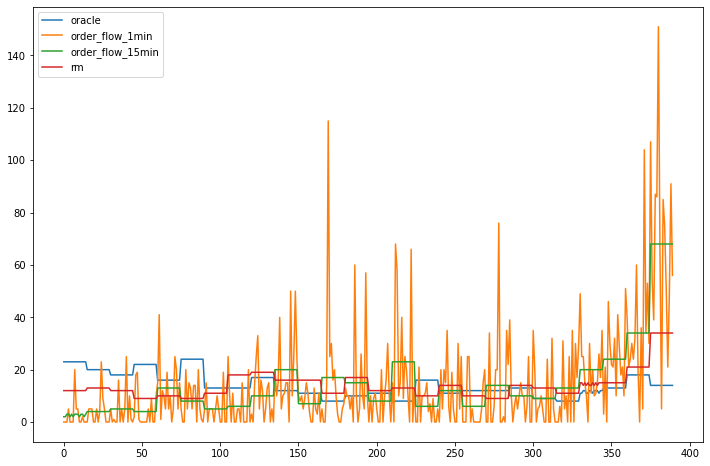

In [74]:
dfc = dfa[['oracle','order_flow_1min','order_flow_15min','rm']]
# dfc = dfa[['vwap','oracle','order_flow','rm']]
# dfc = dfa[['vwap','oracle','order_flow','rm','twap']]
dfc.reset_index(drop=True, inplace=True)
dfc.plot(figsize=(12,8))

In [81]:

def get_result(ob, msg, date):
    try:
        # prepare ob msg  
        msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  
        # df  
        df = pd.concat([msg, ob], axis=1)  
        df.time *= 1e9  
        df.time = df.time.apply(pd.to_datetime)  
        df.time = df.time.dt.time  
        df['shorten_time'] = pd.to_datetime(df['time'].apply(lambda x:str(x).split('.')[0]), format='%H:%M:%S').dt.strftime('%H%M').astype(str)  
        # df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)  
        df = df[(df['shorten_time'] >= '0930') & (df['shorten_time'] < '1600')]  
        # truncate
        mean = df[[f'bid_price_{i}' for i in range(10)]].mean().mean() 
        # mean = df[[f'bid_price_{i}' for i in range(5)]].mean().mean() 
        mean_ceilling = mean * 10
        mean_bottom = mean * 0.1
        for i in range(10):
            df=df[(mean_bottom<=df[f'bid_price_{i}']) & (df[f'bid_price_{i}']<=mean_ceilling)]
        # task  
        df['trading_volume'] = df[df.type == 4].qty.sum()  
        task_ratio = 0.05  
        df['task_volume'] = (df.trading_volume * task_ratio).apply(int)  
        # dfa  
        dfa = df.drop_duplicates('shorten_time', keep='last')  
            
        # date  
        # date = dates[i]  
        # date = '2017-07-20'  # {from file can get this} - This comment suggests you might want to extract the date from a file.  

        # rm  
        def get_aligned_values(VWAPs):  
            vwap = VWAPs[symbol].loc[date, :]  
            vwap = vwap.reset_index()  
            vwap.timeHMs = vwap.timeHMs.astype(int).astype(str).apply(lambda x: x.zfill(4))  
            vwap.drop('level_0', axis=1, inplace=True)  
            time_df = pd.DataFrame(df.shorten_time.unique(), columns=['timeHMs'])  
            dfb = pd.merge(vwap, time_df, how='right', on='timeHMs')  
            dfb.fillna(method='ffill', inplace=True)  
            return dfb.iloc[:, -1].to_numpy()  

        # jax  
        import jax  
        import jax.numpy as jnp  

        @jax.jit  
        def hamilton_apportionment_permuted_jax(votes, seats, key):  
            init_seats, remainders = jnp.divmod(votes, jnp.sum(votes) / seats)  # std_divisor = jnp.sum(votes) / seats  
            remaining_seats = jnp.array(seats - init_seats.sum(), dtype=jnp.int32)  # in {0,1,2,3}  

            def f(carry, x):  
                key, init_seats, remainders = carry  
                key, subkey = jax.random.split(key)  
                chosen_index = jax.random.choice(subkey, remainders.size, p=(remainders == remainders.max()) / (remainders == remainders.max()).sum())  
                return (key, init_seats.at[chosen_index].add(jnp.where(x < remaining_seats, 1, 0)), remainders.at[chosen_index].set(0)), x  

            (key, init_seats, remainders), x = jax.lax.scan(f, (key, init_seats, remainders), xs=jnp.arange(votes.shape[0]))  
            return init_seats.astype(jnp.int32)  

        rng = jax.random.PRNGKey(0)  
        rng, key = jax.random.split(rng, 2)  

        # dfa with task info  
        dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)  
        dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)  
        dfa['rm'] = hamilton_apportionment_permuted_jax(get_aligned_values(RMs), dfa.task_volume.iloc[0], key)  
        dfa['twap'] = hamilton_apportionment_permuted_jax(get_aligned_values(TWAPs), dfa.task_volume.iloc[0], key)  
        
        # revenue
        def f(x, string):
            qty = x[string]
            levels = [(f'bid_price_{i}', f'bid_qty_{i}') for i in range(10)]
            revenue, accumulated_qty = 0, 0
            
            for level_price, level_qty in levels:
                if qty <= accumulated_qty + x[level_qty]:
                    revenue = revenue + (qty - accumulated_qty) * x[level_price]
                    break
                revenue += x[level_qty] * x[level_price]
                accumulated_qty += x[level_qty]
            return revenue

        
        
        for s in ['vwap','oracle','rm','twap']:
            dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)

        # results  
        dfs = dfa.sum()  
        vwap_advantage = (dfs.vwap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        oracle_advantage = (dfs.oracle_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        twap_advantage = (dfs.twap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        result = [date, vwap_advantage, oracle_advantage, twap_advantage]  
        return result
    except Exception as e:
        print(f"Error reading {symbol} on {date}: {e}")
date = dates[0]
get_result(obs[date],msgs[date],date)

['2017-07-20', -7.291903279886818, -13.44010572739088, -5.185654710372451]

### debug cell

In [1]:
%%bash
cd /homes/80/kang/cmem/data/
tar -czvf 01_raw_rolling_mean_15min_bin.tar.gz /homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/

tar: Removing leading `/' from member names


/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/A.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/AAL.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/AAP.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/AAPL.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ABBV.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ABC.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ABMD.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ABT.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ACN.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ADBE.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ADI.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ADM.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ADP.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ADS.csv
/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/ADSK.

In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd
dir0= "/homes/80/kang/cmem/data/01_raw/"
dir1= "/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/"
onlyFiles = sorted([f for f in listdir(dir0) if isfile(join(dir0, f))])
from tqdm import tqdm
for i in tqdm(range(len(onlyFiles))):
    
    name = onlyFiles[i]
    df = pd.read_pickle(dir0+name)
    d = df[['symbol','date','timeHMs','timeHMe','qty']]
    g = d.groupby('timeHMs')
    lst = []
    for idx, itm in g:
        pass
        value = itm.shift(1).rolling(5).mean()
        # itm.shift(-1).rolling(5).mean()
        value.date = itm.date
        lst.append(value)
    # itm.qty[:5].mean()
    f = pd.concat(lst,axis=0)
    f['symbol'] = name[:-4]
    ff = f.sort_index().dropna()
    ff.to_csv(dir1+name[:-4]+".csv")

  0%|          | 0/497 [00:00<?, ?it/s]/tmp/ipykernel_3543919/2431534768.py:17: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['symbol'], dtype='object')
  value = itm.shift(1).rolling(5).mean()
  0%|          | 1/497 [00:00<02:19,  3.57it/s]/tmp/ipykernel_3543919/2431534768.py:17: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['symbol'], dtype='object')
  value = itm.shift(1).rolling(5).mean()
  0%|          | 2/497 [00:00<01:40,  4.94it/s]/tmp/ipykernel_3543919/2431534768.py:17: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. 

In [4]:
from os import listdir  
from tqdm import tqdm  
import pandas as pd  
import numpy as np
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)

def data_alignment(ATFolder):
    '''
    The logic here is to load the three dir: messages data, rolling mean and vwap
    Then find the common_dates of all these three,
    Then pass into the init of the base env, 
    To only load the data window in the common dates.
    But we should also align the symbols, it has been done, as we will pass symbols 
    into the load_forecasted_and_original_volume_VWAP and load_forecasted_volume_RM
    '''
    def load_forecasted_and_original_volume_VWAP(symbol):
        import pandas as pd
        import numpy as np
        dir = '/homes/80/kang/cmem/output/0900_r_output_with_features_csv_fractional_shares_clipped_vwap/'
        df = pd.read_csv(dir+f'{symbol}.csv',index_col=0)
        df['symbol'] = symbol
        from datetime import datetime, timedelta
        timeHMs = np.array([int((datetime(2023, 1, 1, 9, 30) + i * timedelta(minutes=15)).strftime('%H%M')) for i in range(26)])
        timeHMs = np.tile(timeHMs, (1, int(df.shape[0]/timeHMs.shape[0]))).squeeze()
        df['timeHMs'] = timeHMs
        df = df[['date', 'timeHMs', 'x', 'qty', 'symbol']]
        d = df[['date', 'timeHMs', 'x']].pivot(index = 'date', columns = 'timeHMs')
        f = df[['date', 'timeHMs', 'qty']].pivot(index = 'date', columns = 'timeHMs')
        return d, f # x, qty

    def load_forecasted_volume_RM(symbol):
        import pandas as pd
        import numpy as np
        dir = '/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/'
        pd.read_csv('/homes/80/kang/cmem/data/01_raw_rolling_mean_15min_bin/GPN.csv')
        df = pd.read_csv(dir+f'{symbol}.csv',index_col=0)
        df.columns = ['date', 'timeHMs', 'timeHMe', 'x_rm', 'symbol']
        df.date = df.date.apply(lambda d: str(d)[:4]+'-'+str(d)[4:6]+'-'+str(d)[6:8]) if len(str(df.date[0])) == 8 else df.date
        d = df[['date', 'timeHMs', 'x_rm']].pivot(index = 'date', columns = 'timeHMs')
        d = d.fillna(method = "ffill")
        return d # x

    def load_files(symbol):
        alphatradePath = ATFolder
        # alphatradePath = f"{ATFolder}/{symbol}_data"
        messagePath = alphatradePath+"/Flow_10/"
        orderbookPath = alphatradePath+"/Book_10/"
        from os import listdir; from os.path import isfile, join; import pandas as pd
        readFromPath = lambda data_path: sorted([f for f in listdir(data_path) if isfile(join(data_path, f))])
        messageFiles, orderbookFiles = readFromPath(messagePath), readFromPath(orderbookPath)
        message_dates = np.array([m[4:14] for m in messageFiles])
        message_dates = np.array([m.split("_")[1] for m in messageFiles])
        return message_dates
    
    def get_symbols():
        from os.path import isdir
        from os import listdir
        path_dir1 = '/homes/80/kang/cmem/output/0900_r_output_with_features_csv_fractional_shares_clipped_vwap/'
        path_dir2 = ATFolder
        symbols1 = np.array([dirname.split(".")[0] for dirname in listdir(path_dir1)])
        symbols2 = np.array([path_dir2.split("_")[0].split("/")[-1]])
        # symbols2 = np.array([dirname.split("_")[0] for dirname in listdir(path_dir2) 
        #             if isdir(os.path.join(path_dir2, dirname))])
        intersection = np.intersect1d(symbols1, symbols2)
        return intersection
    common_stocks = get_symbols()
    assert len(common_stocks) >= 1
    
    def get_raw_VWAPs_ORACLEs_RMs():
        ds = [(symbol, *load_forecasted_and_original_volume_VWAP(symbol)) for symbol in common_stocks]
        VWAPs = [(d[0], d[1]) for d in ds]
        ORACLEs = [(d[0], d[2]) for d in ds]
        RMs = [(symbol, load_forecasted_volume_RM(symbol)) for symbol in common_stocks]
        return VWAPs, ORACLEs, RMs
    VWAPs, ORACLEs, RMs = get_raw_VWAPs_ORACLEs_RMs()
    
    def get_common_dates():
        dates_vwap =  VWAPs[-1][-1].index.to_numpy()
        dates_rm =  RMs[-1][-1].index.to_numpy()
        message_dates = load_files(common_stocks[-1]) 
        common_dates = np.intersect1d(np.intersect1d(dates_vwap, message_dates),dates_rm)
        return common_dates
    common_dates = get_common_dates()
    
    def align_dates(Xs):
        Xs = {d[0]: d[1].loc[common_dates] for d in Xs}
        return Xs
    VWAPs, ORACLEs, RMs = list(map(align_dates, [VWAPs, ORACLEs, RMs]))

    def generate_TWAPs(RMs):
        def f(df):
            dff = df.copy()
            dff.loc[:, :] = 1
            return dff
        return {symbol: f(df) for symbol, df in RMs.items()}
    TWAPs = generate_TWAPs(RMs)
            
    return common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs


  
lst = ['AEP','GS','FITB','GPN','AAPL']
symbol = 'GPC' 
  
ATFolder = f"/homes/80/kang/SP500/{symbol}_data"  
# ATFolder = f"/scratch/local/kang/SP500/{symbol}_data"  
common_dates, common_stocks, VWAPs, ORACLEs, RMs, TWAPs = data_alignment(ATFolder)  
obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Book_10/"))]  
msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/"))]  
# obs = [pd.read_csv(ATFolder + "/Book_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Book_10/")[:2])]  
# msgs = [pd.read_csv(ATFolder + "/Flow_10/" + file, header=None) for file in tqdm(listdir(ATFolder + "/Flow_10/")[:2])]  
lobster_dates = [file.split("_")[1] for file in listdir(ATFolder + "/Book_10/")]
dates = np.intersect1d(common_dates, lobster_dates)
assert len(obs) == len(msgs)  
  

results = []  
# for i in tqdm([18]):  
# for i in tqdm(range(15,len(obs))):  
for i in tqdm(range(len(obs))):  
    try:
        # prepare ob msg  
        ob = obs[i]  
        obs1 = ob.iloc[:, [0, 1, 4, 5, 8, 9]]  
        obs1.columns = ['best_ask', 'best_qty', 'second_ask', 'second_qty', 'third_ask', 'third_qty']  
        msg = msgs[i]  
        msg.columns = ['time', 'type', 'id', 'qty', 'price', 'direct', 'remark']  
    
        # df  
        df = pd.concat([msg, obs1], axis=1)  
        df.time *= 1e9  
        df.time = df.time.apply(pd.to_datetime)  
        df.time = df.time.dt.time  
        df['shorten_time'] = pd.to_datetime(df['time'].apply(lambda x:str(x).split('.')[0]), format='%H:%M:%S').dt.strftime('%H%M').astype(str)  
        # df['shorten_time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.strftime('%H%M').astype(str)  
        df = df[(df['shorten_time'] >= '0930') & (df['shorten_time'] < '1600')]  
    
        # task  
        df['trading_volume'] = df[df.type == 4].qty.sum()  
        task_ratio = 0.05  
        df['task_volume'] = (df.trading_volume * task_ratio).apply(int)  
    
        # dfa  
        dfa = df.drop_duplicates('shorten_time', keep='last')  
    
        # date  
        date = dates[i]  
        # date = '2017-07-20'  # {from file can get this} - This comment suggests you might want to extract the date from a file.  
    
        # rm  
        def get_aligned_values(VWAPs):  
            vwap = VWAPs[symbol].loc[date, :]  
            vwap = vwap.reset_index()  
            vwap.timeHMs = vwap.timeHMs.astype(int).astype(str).apply(lambda x: x.zfill(4))  
            vwap.drop('level_0', axis=1, inplace=True)  
            time_df = pd.DataFrame(df.shorten_time.unique(), columns=['timeHMs'])  
            dfb = pd.merge(vwap, time_df, how='right', on='timeHMs')  
            dfb.fillna(method='ffill', inplace=True)  
            return dfb.iloc[:, -1].to_numpy()  
    
        # jax  
        import jax  
        import jax.numpy as jnp  
    
        @jax.jit  
        def hamilton_apportionment_permuted_jax(votes, seats, key):  
            init_seats, remainders = jnp.divmod(votes, jnp.sum(votes) / seats)  # std_divisor = jnp.sum(votes) / seats  
            remaining_seats = jnp.array(seats - init_seats.sum(), dtype=jnp.int32)  # in {0,1,2,3}  
    
            def f(carry, x):  
                key, init_seats, remainders = carry  
                key, subkey = jax.random.split(key)  
                chosen_index = jax.random.choice(subkey, remainders.size, p=(remainders == remainders.max()) / (remainders == remainders.max()).sum())  
                return (key, init_seats.at[chosen_index].add(jnp.where(x < remaining_seats, 1, 0)), remainders.at[chosen_index].set(0)), x  
    
            (key, init_seats, remainders), x = jax.lax.scan(f, (key, init_seats, remainders), xs=jnp.arange(votes.shape[0]))  
            return init_seats.astype(jnp.int32)  
    
        rng = jax.random.PRNGKey(0)  
        rng, key = jax.random.split(rng, 2)  
    
        # dfa with task info  
        dfa['vwap'] = hamilton_apportionment_permuted_jax(get_aligned_values(VWAPs), dfa.task_volume.iloc[0], key)  
        dfa['oracle'] = hamilton_apportionment_permuted_jax(get_aligned_values(ORACLEs), dfa.task_volume.iloc[0], key)  
        dfa['rm'] = hamilton_apportionment_permuted_jax(get_aligned_values(RMs), dfa.task_volume.iloc[0], key)  
        dfa['twap'] = hamilton_apportionment_permuted_jax(get_aligned_values(TWAPs), dfa.task_volume.iloc[0], key)  
    
        # assert  
        assert (dfa.best_qty + dfa.second_qty + dfa.third_qty >= dfa.vwap).all()  
        assert (dfa.best_qty + dfa.second_qty + dfa.third_qty >= dfa.oracle).all()  
        assert (dfa.best_qty + dfa.second_qty + dfa.third_qty >= dfa.rm).all()  
        assert (dfa.best_qty + dfa.second_qty + dfa.third_qty >= dfa.twap).all()  
        
        # revenue
        def f(x,string):
            if x.best_qty>=x[string]:
                price = x.best_ask * x[string]
            elif x.best_qty<x[string]<=x.best_qty+x.second_qty:
                price = x.best_ask*x.best_qty + x.second_ask*(x[string]-x.best_qty)
            elif x.best_qty+x.second_qty<x[string]<=x.best_qty+x.second_qty+x.third_qty:
                price = x.best_ask*x.best_qty + x.second_ask*x.second_qty + x.third_ask*(x[string]-x.best_qty-x.second_qty)
            else:
                raise NotImplementedError
            return price
        for s in ['vwap','oracle','rm','twap']:
            dfa[s+'_revenue'] = dfa.apply(lambda x: f(x,s),axis=1)
    
        # results  
        dfs = dfa.sum()  
        vwap_advantage = (dfs.vwap_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        oracle_advantage = (dfs.oracle_revenue - dfs.rm_revenue) / dfs.rm_revenue * 1e4  
        result = [date, vwap_advantage, oracle_advantage]  
        results.append(result)  
  
    except:
        pass  
dff = pd.DataFrame(results, columns=['date', 'vwap_advantage', 'oracle_advantage'])

  5%|▌         | 13/251 [00:01<00:19, 11.95it/s]

100%|██████████| 251/251 [09:58<00:00,  2.38s/it]


In [11]:
dfa

,time,type,id,qty,price,direct,remark,best_ask,best_qty,second_ask,second_qty,third_ask,third_qty,shorten_time,trading_volume,task_volume
255,09:30:56.920739,3,6491246,100,957000,1,NaN,960000,200,961000,10,962600,100,0930,38703,1935
285,09:31:50.097861,3,7125702,100,953500,1,NaN,960000,200,960200,5,960400,100,0931,38703,1935
365,09:32:57.290256,1,8371162,100,959400,-1,NaN,959400,400,960000,105,960200,5,0932,38703,1935
399,09:33:55.190620,1,9161770,100,955500,1,NaN,958400,100,958500,100,958700,200,0933,38703,1935
433,09:34:49.199383,3,9112186,100,955200,1,NaN,958200,300,958900,5,959800,5,0934,38703,1935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17791,15:55:59.221792,3,157772802,200,951600,-1,NaN,951100,282,951200,380,951400,100,1555,38703,1935
17993,15:56:54.514651,1,158731114,100,951700,-1,NaN,950900,100,951000,100,951400,110,1556,38703,1935
18248,15:57:53.254034,3,159634474,100,950700,1,NaN,951000,100,951200,101,951400,120,1557,38703,1935
18518,15:58:59.890950,3,161006618,100,950600,1,NaN,951400,20,951500,220,951700,300,1558,38703,1935


In [10]:
dfs

type                                                            757
id                                                      46370213302
qty                                                           36640
price                                                     367846300
direct                                                           38
remark                                                            0
best_ask                                                  367965600
best_qty                                                      58567
second_ask                                                368018000
second_qty                                                    77132
third_ask                                                 368074800
third_qty                                                     91723
shorten_time      0930093109320933093409350936093709380939094009...
trading_volume                                             44214690
task_volume                                     

In [7]:
symbol

'GPC'

In [8]:
dff

,date,vwap_advantage,oracle_advantage
0,2017-07-20,2.734581,10.464847
1,2017-07-21,-4.227450,-3.965636
2,2017-07-24,0.672123,1.298484
3,2017-07-26,1.814326,1.867831
4,2017-07-27,-6.614667,-9.789352
...,...,...,...
84,2017-12-08,0.169195,0.492873
85,2017-12-15,4.899289,2.158554
86,2017-12-18,1.139581,3.453691
87,2017-12-19,-8.869012,-14.453650


In [6]:
dff.mean()

vwap_advantage      1.048364
oracle_advantage    2.428116
dtype: float64

## find at what percentage level the best bid level was all taken

In [ ]:
(base) kang@flair-node-01:~/AlphaTrade/gymnax_exchange/jaxrl$ python -m pip list | grep jax
jax                           0.4.16
jax-jumpy                     1.0.0
jaxlib                        0.4.12
(base) kang@flair-node-01:~/AlphaTrade/gymnax_exchange/jaxrl$ pip install jax==0.4.12

In [51]:
total_volume = msg[msg.type==4].qty.sum()

In [53]:
total_volume*0.01

37777.57

# run r to get the cmem results

In [5]:
cd /homes/80/kang/cmem/data_minmax/02.2_data_r_input_kf_minmax/

/homes/80/kang/cmem/data_minmax/02.2_data_r_input_kf_minmax


In [6]:
path = '/homes/80/kang/cmem/data_minmax/02.2_data_r_input_kf_minmax/'
from os import listdir
lst = listdir(path)
lstt = [file[:-4] for file in lst]

In [7]:
for idx, itm in enumerate(lstt):
    if itm in lstsymbols:
        print(idx, itm)

3 AAPL
16 AEP
174 FITB
196 GPN
199 GS


## use this r code:
/homes/80/kang/cmem/rkf_fraction.r
## hers is the output dir
/homes/80/kang/cmem/output/0400_r_kl_output_raw_data_minmax/


## check whether all the data is generated correctly

In [8]:
%%bash
cd /homes/80/kang/cmem/output/0400_r_kl_output_raw_data_minmax/
ls | wc

    472     472    3833


In [9]:
#  note the data might not all generated

# we have to generate this after the r code output: 
0900_r_output_with_features_csv_fractional_shares_clipped_vwap

## get symbol  codes

In [5]:
dir = '/homes/80/kang/cmem/output/0400_r_kl_output_raw_data_minmax/'
import os 
from os import listdir
lst = sorted([file[:-4] for file in listdir(dir)])
len(lst)

472

In [13]:
file_path = '/homes/80/kang/cmem/stock_names.txt'
reloaded_stock_names = []
with open(file_path, 'r') as f:
    reloaded_stock_names = [line.strip() for line in f.readlines()]
reloaded_stock_names,len(reloaded_stock_names)
lst = reloaded_stock_names

### from mihai's shares outstanding data

In [14]:
from os import listdir
from os.path import isfile, join
dir0 = "/homes/80/kang/2017daily_csv/"
onlyFiles = sorted([f for f in listdir(dir0) if isfile(join(dir0, f))])
dfflst =[]
i=0
# for i in range(len(onlyFiles)):
print(i)
name = onlyFiles[i]
import pandas as pd
# name ="CMS.csv"

dir = dir0+name
df = pd.read_csv(dir)
mhlst = sorted(df.ticker.to_list())
len(mhlst)
lstt = [file for file in mhlst if file in lst]
len(lstt)

0


384

In [15]:
lst0=[file for file in lst if file not in lstt]
len(lst0)

99

### lst0 is the missing parts

In [16]:
lst0

['A',
 'AAPL',
 'ADBE',
 'ADSK',
 'AKAM',
 'ALGN',
 'ALXN',
 'AMAT',
 'AMGN',
 'AMZN',
 'ANSS',
 'ATVI',
 'AVGO',
 'BF.B',
 'BIIB',
 'BRK.B',
 'CBOE',
 'CDW',
 'CERN',
 'CHRW',
 'CHTR',
 'CINF',
 'CMCSA',
 'COST',
 'CPRT',
 'CSCO',
 'CTAS',
 'CTSH',
 'CTXS',
 'DISCA',
 'DISCK',
 'DISH',
 'DLTR',
 'EA',
 'EBAY',
 'EQIX',
 'EXPD',
 'EXPE',
 'FANG',
 'FAST',
 'FFIV',
 'FISV',
 'FITB',
 'FLIR',
 'FTNT',
 'GILD',
 'GOOG',
 'GOOGL',
 'GRMN',
 'HBAN',
 'HOLX',
 'HSIC',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'IPGP',
 'ISRG',
 'JBHT',
 'JKHY',
 'KHC',
 'KLAC',
 'LKQ',
 'LRCX',
 'MCHP',
 'MKTX',
 'MNST',
 'MSFT',
 'MXIM',
 'NDAQ',
 'NFLX',
 'NTAP',
 'NTRS',
 'NVDA',
 'NWSA',
 'ODFL',
 'ORLY',
 'PAYX',
 'PBCT',
 'PCAR',
 'PYPL',
 'QCOM',
 'QRVO',
 'REGN',
 'ROST',
 'SBAC',
 'SBUX',
 'SIVB',
 'SNPS',
 'SWKS',
 'TRIP',
 'TROW',
 'TSCO',
 'TTWO',
 'ULTA',
 'VRSK',
 'VRSN',
 'VRTX',
 'WYNN']